# EMA + ADX + MACD + StochRSI
### buy--condition : EMA[1] > EMA[2] and ADX > 25 and ADXPOS > 25 and MACD > Signal and StochRSI < 0.8
### sell--condition : MACD < Signal and StochRSI > 0.2

In [22]:
# -- Import --
import pandas as pd
from binance.client import Client
import ta
import pandas_ta as pda
import matplotlib.pyplot as plt
import numpy as np

# -- Define Binance Client --
client = Client()

# -- You can change the crypto pair ,the start date and the time interval below --
pairName = "BTCUSDT"
startDate = "01 January 2017"
timeInterval = Client.KLINE_INTERVAL_1HOUR

# -- Load all price data from binance API --
klinesT = client.get_historical_klines(pairName, timeInterval, startDate)

# -- Define your dataset --
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

# -- Set the date to index --
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']

print("Data loaded 100%")

# -- Uncomment the line below if you want to check your price dataset --
# df

Data loaded 100%


In [23]:
# -- Drop all columns we do not need --
df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)

# -- All Indicators --

# Exponential Moving Average
df['EMA1']=ta.trend.ema_indicator(close=df['close'], window=9)
df['EMA2']=ta.trend.ema_indicator(close=df['close'], window=21)

# MACD
MACD = ta.trend.MACD(close=df['close'], window_fast=12, window_slow=26, window_sign=9)
df['MACD'] = MACD.macd()
df['MACD_SIGNAL'] = MACD.macd_signal()
df['MACD_DIFF'] = MACD.macd_diff() #Histogramme MACD

# Stochastic RSI
df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=14, smooth1=3, smooth2=3) #Non moyenné 
df['STOCH_RSI_D'] = ta.momentum.stochrsi_d(close=df['close'], window=14, smooth1=3, smooth2=3) #Orange sur TradingView
df['STOCH_RSI_K'] = ta.momentum.stochrsi_k(close=df['close'], window=14, smooth1=3, smooth2=3) #Bleu sur TradingView

#ADX
ADX = ta.trend.ADXIndicator(df['high'], df['low'], df['close'], window=14) 
df['ADX'] = ADX.adx()
df['ADX_NEG'] = ADX.adx_neg()
df['ADX_POS'] = ADX.adx_pos()

# -- Print --
print("Indicators loaded 100%")

# -- Uncomment the line below if you want to check your dataset with indicators --
df

Indicators loaded 100%


C:\Users\alexb\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\alexb\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


,open,high,low,close,volume,EMA1,EMA2,MACD,MACD_SIGNAL,MACD_DIFF,STOCH_RSI,STOCH_RSI_D,STOCH_RSI_K,ADX,ADX_NEG,ADX_POS
timestamp,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.18100900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.23491600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.22969100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.44324900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.97280700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-19 16:00:00,39969.92,40345.62,39850.00,39946.40,1505.30357000,39961.007291,40083.235165,-178.516752,-210.769203,32.252452,0.638789,0.521437,0.586150,38.542284,17.960462,16.678216
2022-02-19 17:00:00,39946.41,40168.05,39872.67,40142.43,697.53924000,39997.291833,40088.616513,-152.700827,-199.155528,46.454701,1.000000,0.653946,0.773160,36.053676,16.778546,15.580680
2022-02-19 18:00:00,40142.43,40203.88,40044.42,40115.33,418.66031000,40020.899466,40091.045012,-132.896318,-185.903686,53.007368,0.948874,0.740621,0.862554,33.551139,16.160283,15.834526


In [24]:
dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
#dfTest = df['2021-01-01':'2022-01-01']

# -- Definition of dt, that will be the dataset to do your trades analyses --
dt = None
dt = pd.DataFrame(columns=['date', 'position', 'reason',
                           'price', 'frais', 'wallet', 'drawBack'])

# -- You can change variables below --
leverage = 4
wallet = 100

# -- Binance futures fees --
makerFee = 0.00020
takerFee = 0.00040

# -- Do not touch these values --
initalWallet = wallet
lastAth = wallet
previousRow = dfTest.iloc[0]
stopLoss = 0
takeProfit = 500000
orderInProgress = ''
longIniPrice = 0
shortIniPrice = 0
longLiquidationPrice = 500000
shortLiquidationPrice = 0

# -- Condition to open Market LONG --
def openLongCondition(row, previousRow):
    if (row['EMA1'] > row['EMA2']
    and row['ADX'] > 25
    and row['ADX_POS'] > 25
    and row['MACD'] > row['MACD_SIGNAL']
    and row['STOCH_RSI'] < 0.80):
        return True
    else:
        return False

# -- Condition to close Market LONG --
def closeLongCondition(row, previousRow):
    if (row['MACD'] < row['MACD_SIGNAL']
    and row['STOCH_RSI'] > 0.20):
        return True
    else:
        return False

# -- Iteration on all your price dataset (df) --
for index, row in dfTest.iterrows():

    # -- If there is an order in progress --
    if orderInProgress != '':
        # -- Check if there is a LONG order in progress --
        if orderInProgress == 'LONG':
            # -- Check Liquidation --
            if row['low'] < longLiquidationPrice:
                print('/!\ YOUR LONG HAVE BEEN LIQUIDATED the',index)
                break

            # -- Check If you have to close the LONG --
            elif closeLongCondition(row, previousRow) == True:
                orderInProgress = ''
                closePrice = row['close']
                closePriceWithFee = row['close'] - takerFee * row['close']
                pr_change = (closePriceWithFee - longIniPrice) / longIniPrice
                wallet = wallet + wallet*pr_change*leverage

                # -- You can uncomment the line below if you want to see logs --
                # print('Close LONG at',closePrice,"the", index, '| wallet :', wallet,
                #       '| result :', pr_change*100*leverage)


                # -- Check if your wallet hit a new ATH to know the drawBack --
                if wallet > lastAth:
                    lastAth = wallet
                
                # -- Add the trade to DT to analyse it later --
                myrow = {'date': index, 'position': "LONG", 'reason': 'Close Long Market', 'price': closePrice,
                        'frais': takerFee * wallet * leverage, 'wallet': wallet, 'drawBack': (wallet-lastAth)/lastAth}
                dt = dt.append(myrow, ignore_index=True)

    # -- If there is NO order in progress --
    if orderInProgress == '':
        # -- Check If you have to open a LONG --
        if openLongCondition(row, previousRow) == True:
            orderInProgress = 'LONG'
            closePrice = row['close']
            longIniPrice = row['close'] + takerFee * row['close']
            tokenAmount = (wallet * leverage) / row['close']
            longLiquidationPrice = longIniPrice - (wallet/tokenAmount)

            # -- You can uncomment the line below if you want to see logs --
            # print('Open LONG at', closePrice, '$ the', index, '| Liquidation price :', longLiquidationPrice)

            # -- Add the trade to DT to analyse it later --
            myrow = {'date': index, 'position': "Open Long", 'reason': 'Open Long Market', 'price': closePrice,
                     'frais': takerFee * wallet * leverage, 'wallet': wallet, 'drawBack': (wallet-lastAth)/lastAth}
            dt = dt.append(myrow, ignore_index=True)

# -- BackTest Analyses --
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat%'] = dt['wallet'].pct_change()*100

dt['tradeIs'] = ''
dt.loc[dt['resultat%'] > 0, 'tradeIs'] = 'Good'
dt.loc[dt['resultat%'] < 0, 'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPercentage = ((lastClose - iniClose)/iniClose)
holdWallet = holdPercentage * leverage * initalWallet
algoPercentage = ((wallet - initalWallet)/initalWallet)
vsHoldPercentage = ((wallet - holdWallet)/holdWallet) * 100

try:
    tradesPerformance = round(dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].sum()
            / dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].count(), 2)
except:
    tradesPerformance = 0
    print("/!\ There is no Good or Bad Trades in your BackTest, maybe a problem...")

try:
    TotalGoodTrades = dt.groupby('tradeIs')['date'].nunique()['Good']
    AveragePercentagePositivTrades = round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(), 2)
    idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
    bestTrade = str(
        round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(), 2))
except:
    TotalGoodTrades = 0
    AveragePercentagePositivTrades = 0
    idbest = ''
    bestTrade = 0
    print("/!\ There is no Good Trades in your BackTest, maybe a problem...")

try:
    TotalBadTrades = dt.groupby('tradeIs')['date'].nunique()['Bad']
    AveragePercentageNegativTrades = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(), 2)
    idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
    worstTrade = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(), 2)
except:
    TotalBadTrades = 0
    AveragePercentageNegativTrades = 0
    idworst = ''
    worstTrade = 0
    print("/!\ There is no Bad Trades in your BackTest, maybe a problem...")

totalTrades = TotalBadTrades + TotalGoodTrades

try:
    TotalLongTrades = dt.groupby('position')['date'].nunique()['LONG']
    AverageLongTrades = round(dt.loc[dt['position'] == 'LONG', 'resultat%'].sum()
                              / dt.loc[dt['position'] == 'LONG', 'resultat%'].count(), 2)
    idBestLong = dt.loc[dt['position'] == 'LONG', 'resultat%'].idxmax()
    bestLongTrade = str(
        round(dt.loc[dt['position'] == 'LONG', 'resultat%'].max(), 2))
    idWorstLong = dt.loc[dt['position'] == 'LONG', 'resultat%'].idxmin()
    worstLongTrade = str(
        round(dt.loc[dt['position'] == 'LONG', 'resultat%'].min(), 2))
except:
    AverageLongTrades = 0
    TotalLongTrades = 0
    bestLongTrade = ''
    idBestLong = ''
    idWorstLong = ''
    worstLongTrade = ''
    print("/!\ There is no LONG Trades in your BackTest, maybe a problem...")

try:
    totalGoodLongTrade = dt.groupby(['position', 'tradeIs']).size()['LONG']['Good']
except:
    totalGoodLongTrade = 0
    print("/!\ There is no good LONG Trades in your BackTest, maybe a problem...")

try:
    totalBadLongTrade = dt.groupby(['position', 'tradeIs']).size()['LONG']['Bad']
except:
    totalBadLongTrade = 0
    print("/!\ There is no bad LONG Trades in your BackTest, maybe a problem...")

TotalTrades = TotalGoodTrades + TotalBadTrades
winRateRatio = (TotalGoodTrades/TotalTrades) * 100

reasons = dt['reason'].unique()

print("BackTest finished, final wallet :",wallet,"$")
dt

BackTest finished, final wallet : 76667.28686905092 $


,date,position,reason,price,frais,wallet,drawBack,resultat%,tradeIs
date,,,,,,,,,
2017-08-25 01:00:00,2017-08-25 01:00:00,Open Long,Open Long Market,4333.01,0.160000,100,0.000000,NaN,
2017-08-25 07:00:00,2017-08-25 07:00:00,LONG,Close Long Market,4329.00,0.158896,99.310243,-0.006898,-0.689757,Bad
2017-08-29 16:00:00,2017-08-29 16:00:00,Open Long,Open Long Market,4503.92,0.158896,99.310243,-0.006898,0.000000,
2017-08-30 12:00:00,2017-08-30 12:00:00,LONG,Close Long Market,4570.00,0.167706,104.816102,0.000000,5.544100,Good
2017-09-01 13:00:00,2017-09-01 13:00:00,Open Long,Open Long Market,4777.02,0.167706,104.816102,0.000000,0.000000,
...,...,...,...,...,...,...,...,...,...
2022-02-08 00:00:00,2022-02-08 00:00:00,LONG,Close Long Market,43850.00,130.918606,81824.128745,-0.597475,18.975452,Good
2022-02-08 06:00:00,2022-02-08 06:00:00,Open Long,Open Long Market,44791.58,130.918606,81824.128745,-0.597475,0.000000,
2022-02-08 20:00:00,2022-02-08 20:00:00,LONG,Close Long Market,44271.95,124.429511,77768.444684,-0.617427,-4.956587,Bad


In [25]:
print("Pair Symbol :",pairName,)
print("Period : [" + str(dfTest.index[0]) + "] -> [" +
      str(dfTest.index[len(dfTest)-1]) + "]")
print("Starting balance :", initalWallet, "$")

print("\n----- General Informations -----")
print("Final balance :", round(wallet, 2), "$")
print("Performance vs US Dollar :", round(algoPercentage*100, 2), "%")
print("Buy and Hold Performence :", round(holdPercentage*100, 2),
      "% | with Leverage :", round(holdPercentage*100, 2)*leverage, "%")
print("Performance vs Buy and Hold :", round(vsHoldPercentage, 2), "%")
print("Best trade : +"+bestTrade, "%, the ", idbest)
print("Worst trade :", worstTrade, "%, the ", idworst)
print("Worst drawBack :", str(100*round(dt['drawBack'].min(), 2)), "%")
print("Total fees : ", round(dt['frais'].sum(), 2), "$")

print("\n----- Trades Informations -----")
print("Total trades on period :",totalTrades)
print("Number of positive trades :", TotalGoodTrades)
print("Number of negative trades : ", TotalBadTrades)
print("Trades win rate ratio :", round(winRateRatio, 2), '%')
print("Average trades performance :",tradesPerformance,"%")
print("Average positive trades :", AveragePercentagePositivTrades, "%")
print("Average negative trades :", AveragePercentageNegativTrades, "%")

print("\n----- LONG Trades Informations -----")
print("Number of LONG trades :",TotalLongTrades)
print("Average LONG trades performance :",AverageLongTrades, "%")
print("Best  LONG trade +"+bestLongTrade, "%, the ", idBestLong)
print("Worst LONG trade", worstLongTrade, "%, the ", idWorstLong)
print("Number of positive LONG trades :",totalGoodLongTrade)
print("Number of negative LONG trades :",totalBadLongTrade)
print("LONG trade win rate ratio :", round(totalGoodLongTrade/TotalLongTrades*100, 2), '%')

print("\n----- Trades Reasons -----")
reasons = dt['reason'].unique()
for r in reasons:
    print(r+" number :", dt.groupby('reason')['date'].nunique()[r])

Pair Symbol : BTCUSDT
Period : [2017-08-17 04:00:00] -> [2022-02-19 20:00:00]
Starting balance : 100 $

----- General Informations -----
Final balance : 76667.29 $
Performance vs US Dollar : 76567.29 %
Buy and Hold Performence : 828.38 % | with Leverage : 3313.52 %
Performance vs Buy and Hold : 2213.78 %
Best trade : +86.46 %, the  2017-12-08 14:00:00
Worst trade : -44.52 %, the  2021-09-07 19:00:00
Worst drawBack : -76.0 %
Total fees :  41475.63 $

----- Trades Informations -----
Total trades on period : 438
Number of positive trades : 230
Number of negative trades :  208
Trades win rate ratio : 52.51 %
Average trades performance : 2.07 %
Average positive trades : 7.99 %
Average negative trades : -4.49 %

----- LONG Trades Informations -----
Number of LONG trades : 438
Average LONG trades performance : 2.07 %
Best  LONG trade +86.46 %, the  2017-12-08 14:00:00
Worst LONG trade -44.52 %, the  2021-09-07 19:00:00
Number of positive LONG trades : 230
Number of negative LONG trades : 208



----- Plot -----


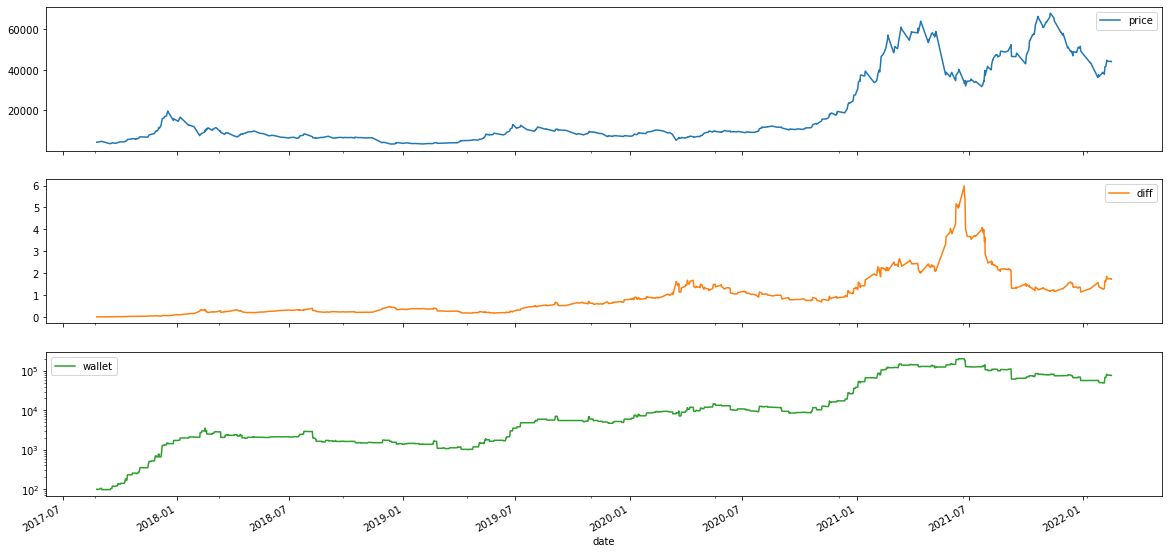

In [28]:
dt['diff'] = dt['wallet']/dt['price']

dt[['price','diff', 'wallet']].plot(subplots=True, figsize=(20, 10))
plt.semilogy()
print("\n----- Plot -----")